In [1]:
import numpy as np
from scipy.integrate import odeint
from scipy import optimize
import matplotlib.pyplot as plt
import matplotlib
from IPython.core.display import SVG

In [2]:
SVG(filename='chuas_circuit.svg')

$x_1 = U_{C1} \qquad x_2 = U_{C2} \qquad x_3 = i_L$

$g(u) = m_0u + \frac{1}{2}(m_1-m_0)(|u+B_p|-|u-B_p|)$

$\dot{x_1} = -\frac{1}{C_1R}x_1 + \frac{1}{C_1 R}x_2 - \frac{1}{C_1}g(x_1)$

$\dot{x_2} = \frac{1}{C_2R}x_1 - \frac{1}{C_2R}x_2+\frac{1}{C_2}x_3$

$\dot{x_3} = -\frac{1}{L}x_2$

In [27]:
def model(x, t, C_1, C_2, L, R, m_0, m_1, B_P):
    x1 = x[0]
    x2 = x[1]
    x3 = x[2]
    
    g = m_0*x1 + 0.5*(m_1-m_0)*(abs(x1+B_P)-abs(x1-B_P))
    
    dx1 = (x2-x1)/(C_1*R) - g/C_1
    dx2 = (x1-x2)/(C_2*R) + x3/C_2
    dx3 = -x2/L
    
    dx = [dx1, dx2, dx3]
    return dx

def run_model(T, N, x0, C_1, C_2, L, R, m_0, m_1, B_P):
    t = np.linspace(start=0, stop=T, num=N)

    x_s = odeint(model, x0, t, args=(1/9, 1, 1/7, 1/0.7, -0.5, -0.8, 1))

    fig = plt.figure(figsize=(10, 10))
    fig.add_subplot(3, 1, 1)
    plt.plot(t, x_s[:,0])
    plt.xlabel('czas, s')
    plt.ylabel('U_C1, V')
    plt.grid()
    fig.add_subplot(3, 1, 2)
    plt.plot(t, x_s[:,1])
    plt.xlabel('czas, s')
    plt.ylabel('U_C2, V')
    plt.grid()
    fig.add_subplot(3, 1, 3)
    plt.plot(t, x_s[:,2])
    plt.xlabel('czas, s')
    plt.ylabel('i_L, A')
    plt.grid()

    fig = plt.figure(figsize=(10, 10))
    plt.plot(x_s[:,0], x_s[:,1])
    plt.ylabel('U_C1, V')
    plt.ylabel('U_C2, V')
    plt.grid()

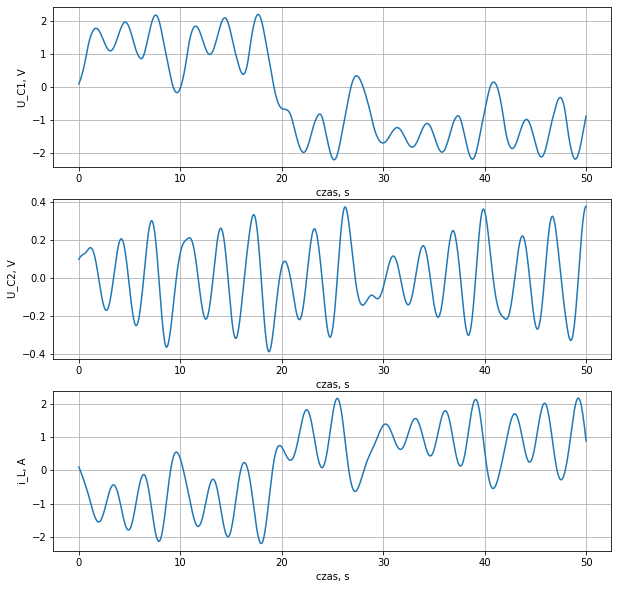

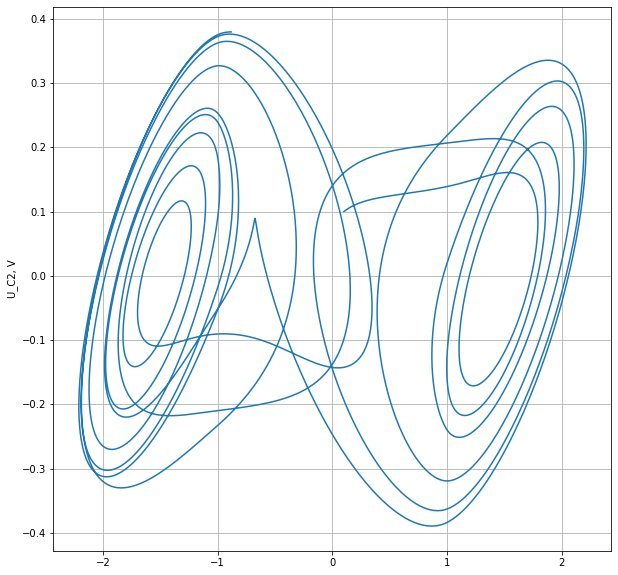

In [28]:
T = 50
N = 5000

C_1, C_2, L, R, m_0, m_1, B_P = 1/9, 1, 1/7, 1/0.7, -0.5, -0.8, 1
x0 = [0.1, 0.1, 0.1]

run_model(T, N, x0, C_1, C_2, L, R, m_0, m_1, B_P)